In [1]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Create a dataset
data = {
    'Student_ID': range(1, 21),
    'Math_Score': [78, 85, 62, 90, np.nan, 45, 95, 67, 82, 58, 75, 49, 91, 86, 100, 101, -5, 60, 88, 77],
    'Science_Score': [80, 75, 67, 92, 70, 55, 99, 65, 88, 60, np.nan, 53, 96, 81, 93, 85, 59, 61, 84, 72],
    'English_Score': [70, 85, 73, 89, 77, 64, 90, 69, 84, 66, 72, 61, 92, np.nan, 95, 88, 60, 65, 86, 74],
    'Attendance_Percentage': [85, 90, 70, 95, 88, 60, 100, 76, 82, 67, 89, 74, 91, 86, 97, 93, 65, 69, np.nan, 80],
    'Study_Hours': [5, 8, 6, 10, 7, 3, 12, 6, 9, 5, 4, 3, 11, 7, 13, 50, 2, 4, 8, 6]  # 50 is an outlier
}

df = pd.DataFrame(data)
print(df)


    Student_ID  Math_Score  Science_Score  English_Score  \
0            1        78.0           80.0           70.0   
1            2        85.0           75.0           85.0   
2            3        62.0           67.0           73.0   
3            4        90.0           92.0           89.0   
4            5         NaN           70.0           77.0   
5            6        45.0           55.0           64.0   
6            7        95.0           99.0           90.0   
7            8        67.0           65.0           69.0   
8            9        82.0           88.0           84.0   
9           10        58.0           60.0           66.0   
10          11        75.0            NaN           72.0   
11          12        49.0           53.0           61.0   
12          13        91.0           96.0           92.0   
13          14        86.0           81.0            NaN   
14          15       100.0           93.0           95.0   
15          16       101.0           85.

In [2]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Detect invalid values (e.g., negative or >100 for scores)
invalid_math = df[(df['Math_Score'] < 0) | (df['Math_Score'] > 100)]
print("\nInvalid Math Scores:\n", invalid_math)



Missing values:
 Student_ID               0
Math_Score               1
Science_Score            1
English_Score            1
Attendance_Percentage    1
Study_Hours              0
dtype: int64

Invalid Math Scores:
     Student_ID  Math_Score  Science_Score  English_Score  \
15          16       101.0           85.0           88.0   
16          17        -5.0           59.0           60.0   

    Attendance_Percentage  Study_Hours  
15                   93.0           50  
16                   65.0            2  


In [3]:
# Fill missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Correct inconsistent scores
df['Math_Score'] = df['Math_Score'].clip(0, 100)


In [4]:
# Detect outliers in Study_Hours
Q1 = df['Study_Hours'].quantile(0.25)
Q3 = df['Study_Hours'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Study_Hours'] < lower_bound) | (df['Study_Hours'] > upper_bound)]
print("\nOutliers in Study_Hours:\n", outliers)

# Cap outliers using winsorization
df['Study_Hours'] = df['Study_Hours'].clip(lower_bound, upper_bound)



Outliers in Study_Hours:
     Student_ID  Math_Score  Science_Score  English_Score  \
15          16       100.0           85.0           88.0   

    Attendance_Percentage  Study_Hours  
15                   93.0           50  


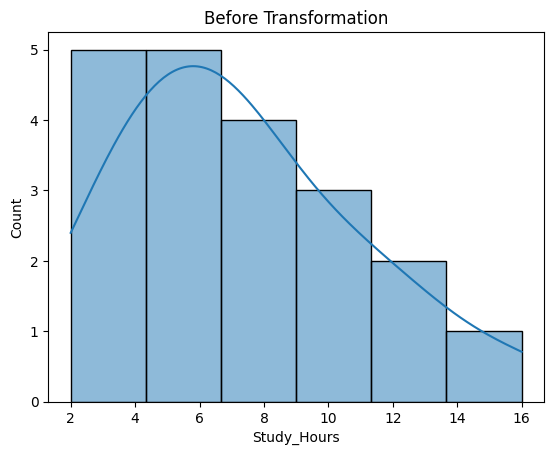

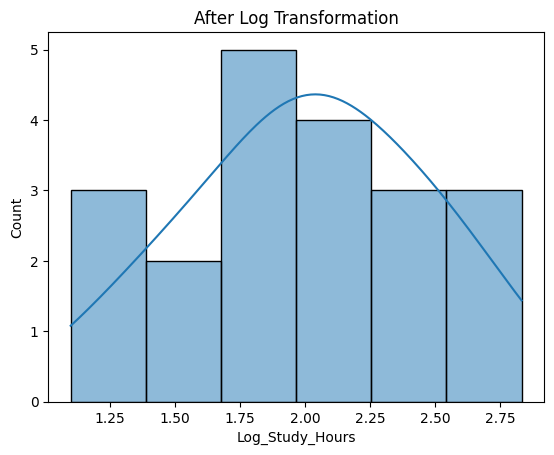

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Before transformation
sns.histplot(df['Study_Hours'], kde=True)
plt.title("Before Transformation")
plt.show()

# Apply log(1 + x) to handle zero values
df['Log_Study_Hours'] = np.log1p(df['Study_Hours'])

# After transformation
sns.histplot(df['Log_Study_Hours'], kde=True)
plt.title("After Log Transformation")
plt.show()
